<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/featurebranch/gangireddy_nallagondu_hotmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/Sales_LinReg.csv"


In [40]:

# Read the CSV file from the URL
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())

   Republic  NDTV   TV5   TV9  AajTak  sales
0       8.7  48.9   4.0  75.0    49.0    7.2
1      57.5  32.8  65.9  23.5    57.5   11.8
2     120.2  19.6   7.2  11.6    18.5   13.2
3       8.6   2.1  46.0   1.0     2.6    4.8
4     199.8   2.6  52.9  21.2     2.9   10.6


In [44]:
data.shape

(305, 6)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [73]:
# Handling missing values
#data.fillna(data.mean(), inplace=True)
data.isna().sum()

# Display the first few rows of the dataframe
print(data.head())

   Republic  NDTV   TV5   TV9  AajTak  sales
0       8.7  48.9   4.0  75.0    49.0    7.2
1      57.5  32.8  65.9  23.5    57.5   11.8
2     120.2  19.6   7.2  11.6    18.5   13.2
3       8.6   2.1  46.0   1.0     2.6    4.8
4     199.8   2.6  52.9  21.2     2.9   10.6


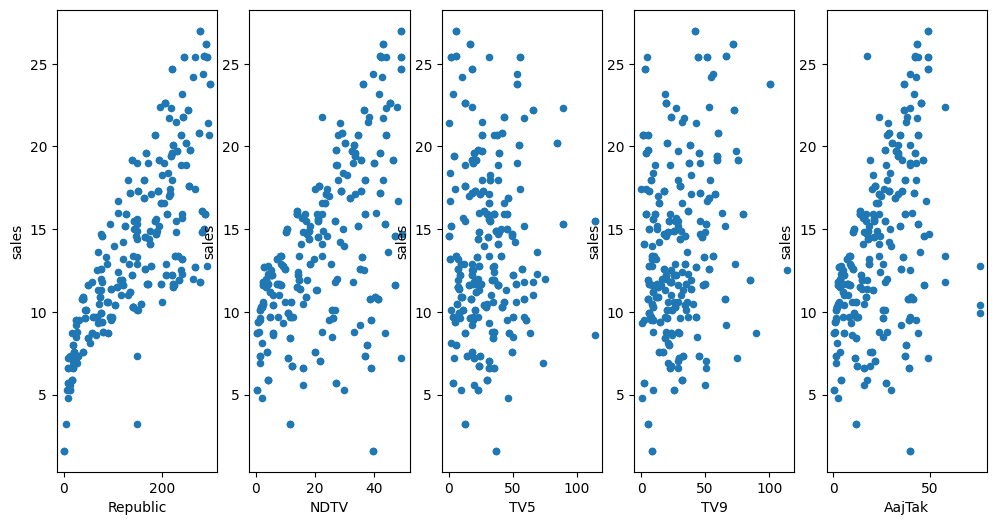

In [74]:
fig, axs = plt.subplots(1,5)
data.plot(kind='scatter', x='Republic', y='sales', ax=axs[0], figsize=(12,6))
data.plot(kind='scatter', x='NDTV', y='sales', ax=axs[1])
data.plot(kind='scatter', x='TV5', y='sales', ax=axs[2])
data.plot(kind='scatter', x='TV9', y='sales', ax=axs[3])
data.plot(kind='scatter', x='AajTak', y='sales', ax=axs[4])
fig.savefig('testdata.jpg')

In [75]:
data.isna().sum()

Republic    0
NDTV        0
TV5         0
TV9         0
AajTak      0
sales       0
dtype: int64

In [76]:
# Split the data into features (X) and the target variable (y)
X = data[['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak']]
y = data['sales']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [90]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [91]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 3.197246262904208
Test MSE: 4.0849455869087015


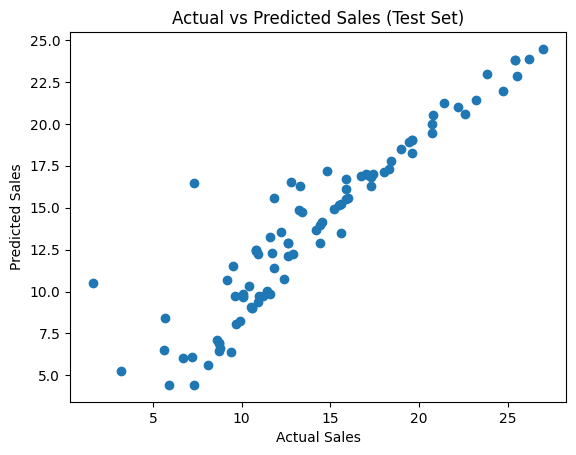

In [92]:
# Plotting actual vs predicted values for the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Test Set)")
plt.show()

In [93]:
X = data[['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Print the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

    Feature  Coefficient
0  Republic     0.044237
1      NDTV     0.166752
2       TV5     0.001042
3       TV9     0.000470
4    AajTak     0.024538


In [95]:
# Compute the correlation matrix
correlation_matrix = data[['Republic', 'NDTV', 'TV5', 'TV9', 'AajTak']].corr()

# Print the correlation matrix
print(correlation_matrix)

          Republic      NDTV       TV5       TV9    AajTak
Republic  1.000000  0.065938  0.056997  0.123155  0.015245
NDTV      0.065938  1.000000 -0.007168  0.284537  0.866634
TV5       0.056997 -0.007168  1.000000  0.110520 -0.019582
TV9       0.123155  0.284537  0.110520  1.000000  0.203740
AajTak    0.015245  0.866634 -0.019582  0.203740  1.000000
